In [1]:
from src.dataset import CarvanaDataset
import os
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np

In [2]:
data_folder = "data/carvana-image-masking-challenge/"

In [3]:
dataset = CarvanaDataset(data_folder, mode='train')

In [4]:
img_path = dataset.images[0]
img_name = os.path.basename(img_path)[:-len(".jpg")]
img = cv2.imread(img_path)
mask_path = os.path.join(dataset.data_folder, "train_masks",
                                 f"{img_name}_mask.gif")
mask = cv2.imread(mask_path, 0)
gif_image = np.array(Image.open(mask_path))

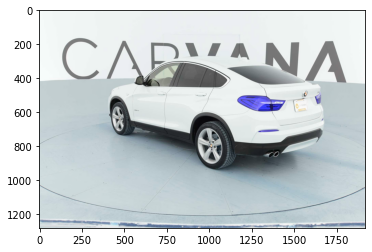

In [5]:
plt.imshow(img)

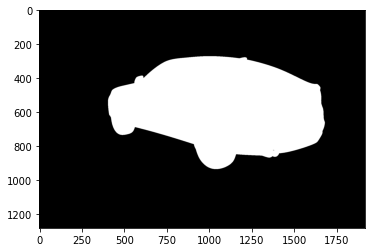

In [6]:
plt.imshow(gif_image, cmap='gray')

In [7]:
from torchvision import transforms

transforms = {
    "train": transforms.Compose([
        transforms.ToTensor(),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomCrop((350, 350)),
        transforms.Resize((512, 512))
    ]),
    "val": transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((512, 512))
    ]) 
}

In [8]:
dataset = CarvanaDataset(data_folder, mode='train', transforms=transforms)